<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/IntroClustering1_kmeans_HDBScan_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1eaZWfBLfmkzNndnA8pJvo6tO4Lm7Qz83' width=500>

#<font color='lightblue'>Clustering</font>

We will look at developing skills to detect clusters in your data. Identifying clusters can be very helpful when exploring your data, and is a form of unsupervised machine learning.
> To perform clustering we will make use of the **sklearn** library. This library is a very useful machine learning library in python. We'll use this library a lot in this course.

There is no single best clustering algorithm, as it will often depend on the data you have and the question you'd like to address. In this exercise we will look at two good clustering algorithms.

*  K-means
*  Hdbscan

Load python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

from sklearn import cluster

### <font color='lightblue'>Simulating data</font>

Simulating data is a great way to test out different machine learning algorithms. Here we'll use the numpy library to create some random numbers.

In [2]:
#simulate 100 values from a normal distribution with a mean of 1 and an sd of 4
x = np.random.normal(1,4, size = 10)

#take a look
x

array([ 1.24577027, -1.22797606, -3.27556312,  3.87097124, -4.98650093,
        3.22958176, -3.68827551,  0.0581366 ,  3.7867863 , -1.07947692])

Let's simulate some data where we know how many clusters there are. 

> First let's create 1000 points and set them to class 1. Each point will get a random x and y coordinate.


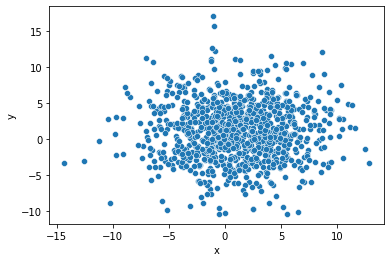

In [3]:
#simulate some random values
array_class1 = {"x":np.random.normal(1,4, size=1000),
                "y":np.random.normal(1,4, size=1000),
                "class": 1}

#put them in a dataframe
df_class1 = pd.DataFrame(data=array_class1)

#plot it
sns.scatterplot(data=df_class1, x="x",y="y")



Create another set of 1000 points and assign them to class 2. Then we'll add the two sets of points together by using **concat**:


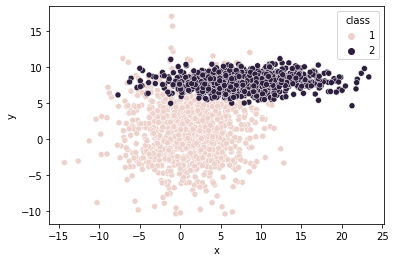

In [4]:
#generate some random values
array_class2 = {"x":np.random.normal(8,5, size=1000),
                "y":np.random.normal(8,1, size=1000),
                "class": 2}

#put them in a dataframe
df_class2 = pd.DataFrame(data=array_class2)

#bind the two dataframes together by rows
df_class = pd.concat([df_class1,df_class2], axis = 0) #axis=0 just says to bind by rows, axis=1 would be by columns 

#plot it
sns.scatterplot(data=df_class, x="x",y="y", hue='class')

### <font color='lightblue'>K-Means</font>

Let's try out the first classification algorithm: k-means. 
> Sklearn uses a standard approach to machine learning models. We'll go through each step with k-means.

**First** let's build the machine learning algorithm that we will use (i.e., k-means)

In [5]:
#initalize the kmeans algorithm
clus_kmeans = cluster.KMeans(n_clusters=2) #how many clusters are there?

**Second** let's fit the model using data

In [6]:
#fit the model
clus_kmeans.fit(df_class[['x','y']] )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Third**, now that the model is built and fit to data we can use it to make predictions!

In [7]:
#make some predictions
df_class['pred_kmeans'] = clus_kmeans.fit_predict(df_class[['x','y']] )

#take a look
df_class

,x,y,class,pred_kmeans
0,0.544922,5.936489,1,0
1,2.362073,0.908918,1,0
2,0.382216,0.722180,1,0
3,2.447315,2.629686,1,0
4,4.448432,0.854660,1,0
...,...,...,...,...
995,21.249903,4.612556,2,1
996,-2.162780,7.563793,2,0
997,6.239683,7.225325,2,1
998,11.697030,6.120433,2,1


**Finaly**, we can visualize the predictions it made by using seaborn

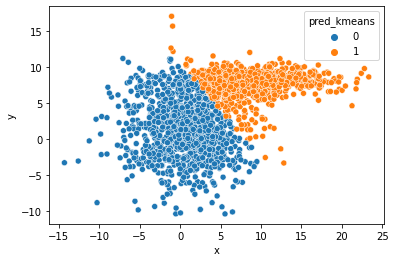

In [8]:
#plot it!
sns.scatterplot(data=df_class,x="x",y="y",hue="pred_kmeans")

This is what is considered as a hard clustering algorithm - it assigns every point to a cluster. It also makes some assumptions about clusters:

*   You know in advance how many clusters there are
*   Clusters are roughly oval shaped (noramlly distributied along each dimension)




<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Go back and try shifting the mean and standard deviation of the simulated clusters and see how well k-means does. Try changing the number of clusters k-means looks for. When does it break down?

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Tuning machine learning algorithms</font>

The elbow method can be used to help choose how many clusters are likely in the data. It also introduces us to how tune machine learning algorithms by running the model using different parameters and monitoring how well the algorithm performs.

First let's measure how successfull the clustering algorithm is. There are many ways to measure *success* in clustering, but here we will use *mean silhouette distance*. Which describes how far apart the points within clusters are from each other.  

In [9]:
#Mean silhouette distance
sk.metrics.silhouette_score(X=df_class.iloc[:,0:2],labels=df_class['pred_kmeans'])

0.4673946215469537

Try the model above with a different number of clusters and see how this mean silhouette value changes. At what number of clusters is the mean silhouette distance the largest (large means more seperation between clusters).
> e.g., is the true number of clusters the highest?

### <font color='lightblue'>Make our own functions</font>

Note: here we are changing a parameter and re-running the code. In cases like these it can be sometimes useful to create our own functions. Let's take a look at how to create a function in python.

In [10]:
#here is a simple function
def run_k_means(numb):
  print(numb)

Now that we've created it let's use it

In [11]:
run_k_means(2)

2


This function just takes one input (numb) and then prints that number.

Let's add each of the model steps above inside the function, with the goal of printing the average silhouette distance.

In [12]:
def run_k_means(numb):
  
  #1. initalize the ml algorithm
  clus_kmeans = cluster.KMeans(n_clusters=numb) #how many clusters are there?

  #2. fit the ml algorithm
  clus_kmeans.fit(df_class[['x','y']] )

  #3. make some predictions
  df_class['pred_kmeans'] = clus_kmeans.fit_predict(df_class[['x','y']] )

  #4. measure performance
  avg_sil = sk.metrics.silhouette_score(X=df_class.iloc[:,0:2],labels=df_class['pred_kmeans'])

  return avg_sil

Notice here that the input (numb) is now used to build a kmeans model with n_clusters = numb
 
Let's use this new function and see how it works!

In [13]:
run_k_means(6)

0.3702248926345584

Is it much easier to figure out what number of clusters results in the highest avgerage silhouette score?

### <font color='lightblue'>Using loops</font>

One last coding trick we'll learn today, is how to use a loop to make this even easier. 
 
Let's first look at how loops work in python

In [14]:
for i in range(2,10):
  print(i)

2
3
4
5
6
7
8
9


Now that we know the basic structure of a loop, and what it can do, let's use it to help figure out what number of clusters is optimal!

In [15]:
for i in range(2,10):
  print(run_k_means(i))

0.4673946215469537
0.3998299602055083
0.389697390356169
0.38232762018173766
0.372778138758704
0.3733449101481793
0.37484346807367014
0.3620860454099939


Let's plot this out! To store the silhouette values as we run the loop, we'll create an empty list (avg_sil) and each run in the loop we'll add the average silhouette value to the list using **append**. 



In [16]:
avg_sil = []
for i in range(2,10):
  avg_sil.append(run_k_means(i))

Now that we have a list of average silhouette values, let's place these values in a **dataframe** and plot them using **seaborn**.

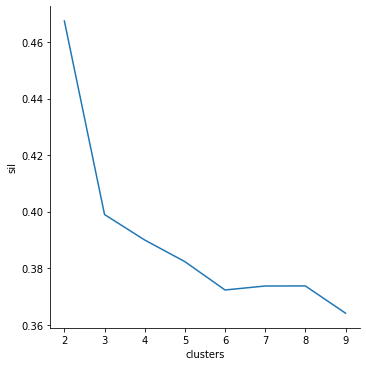

In [17]:
#create a dictionary
dict_sil = {'sil':avg_sil, 'clusters':list(range(2,10)) }

#convert the dictionary into a dataframe
df_sil = pd.DataFrame(dict_sil)

#plot
sns.relplot(x='clusters', y='sil', data=df_sil, kind="line")

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>HDBscan</font>

Ok let's see how another algorithm does: hdbscan. This method is newer than k-means and focuses on the finding high density regions surrounded by low density.

To run this clustering algorithm we need to install another python library. Up until now we've been using the libraries on colab, but now we'd like to use one that is not already installed. To do this we install it manually using the !pip command. Then import it just like any other library.

In [18]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 6.4MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311701 sha256=1bcaf697872df55828ee6c1c580b1c6711d3b32969698ced3465a873cccb57ff
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


Now we can use the **hdbscan** clustering method, it will follow the same steps as sklearn.

First initalize the ml algorithm

In [43]:
#initalize the kmeans algorithm (hyperparameter - choose minimum cluster size)
clus_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 100) 

Second fit the ml algorithm to the data


In [44]:
#fit the model
clus_hdbscan.fit(df_class[['x','y']] )

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

Third use the ml algorithm to make some predictions

In [45]:
#make some predictions
df_class['pred_khdbscan'] = clus_hdbscan.fit_predict(df_class[['x','y']] )

Finally, visualize the predictions of the ml algorithm

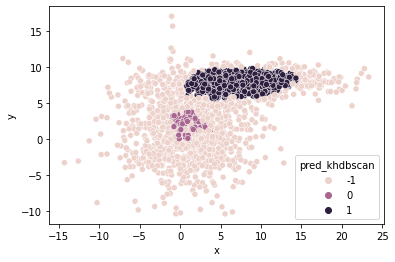

In [46]:
#plot it!
sns.scatterplot(data=df_class, x="x",y="y", hue='pred_khdbscan')

Notice the negative class? This is HDBscans way of saying that it isn't sure about those points. It is a soft clustering algorithm in that it will give you the probability of each point belonging to a class.

We can now measure the mean silhouette distance for HDBscan clustering.

In [47]:
#estimate silhouette score for k-means
sk.metrics.silhouette_score(X=df_class.loc[:,['x','y']], labels=df_class['pred_khdbscan'])

0.02193373482175204

In [48]:
#get only those points that are given a cluster
df_class_sub = df_class[df_class.pred_khdbscan > -1]

#estimate silhouette score for k-means
sk.metrics.silhouette_score(X=df_class_sub.loc[:,['x','y']],labels=df_class_sub['pred_khdbscan'])

0.5418628327721114

How does it do compared to k-means? Does that compare with what you see visually?

### <font color='lightblue'>Make our own functions</font>

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Let's try to make another function just like the one we did for the k-means algorithm. 
> feel free to copy and paste the steps from above
> remember to think carefully about where the input **minNumb** will go in the code.

In [25]:
def run_HDBScan(minNumb):
  
  #1. initalize the ml algorithm
  clus_hdbscan = hdbscan.HDBSCAN(min_cluster_size = minNumb) 

  #2. fit the ml algorithm
  clus_hdbscan.fit(df_class[['x','y']] )

  #3. make some predictions
  df_class['pred_khdbscan'] = clus_hdbscan.fit_predict(df_class[['x','y']] )

  #4. measure performance
  avg_sil = sk.metrics.silhouette_score(X=df_class.loc[:,['x','y']], labels=df_class['pred_khdbscan'])

  return avg_sil

Try out you new function and see if it works!

In [29]:
#run your function with 500 as the minimum number of points
run_HDBScan(100)

0.02193373482175204

### <font color='lightblue'>Running loops</font>

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Let's try and use a loop to try out a bunch of different values for the minimum number of points parameter.

> the **range()** function follows range(from,to,by) format. e.g., range(10,70,10) = 10, 20, 30, 40, 50, 60

In [49]:
for i in range(10,100,10):
  print(run_HDBScan(i))

0.02603605413846452
0.1668066524836304
0.16428220201793806
0.18321897259202558
0.12514253958399563
0.09727003127842199
0.1326669324544277
0.14202104546578306
0.0655370415540757


Bonus: if all is going well, you might want to try to plot the results! 
> You can follow along with how we ploted the results from the k-means.

In [50]:
avg_sil_hd = []
for i in range(10,100,10):
  avg_sil_hd.append(run_HDBScan(i))

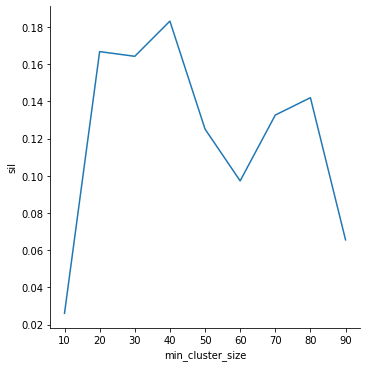

In [51]:
#create a dictionary
dict_sil = {'sil':avg_sil_hd, 'min_cluster_size':list(range(10,100,10)) }

#convert the dictionary into a dataframe
df_sil_hd = pd.DataFrame(dict_sil)

#plot
sns.relplot(x='min_cluster_size', y='sil', data=dict_sil, kind="line")

Can you find an optimum value for min_cluster_size? If you go back and run the HDBScan algorithm with the optimal min_cluster_size what do you find?

# <font color='lightblue'>Further reading</font>

A more detailed look at [HDBScan](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html).

A comparison between a number of different [clustering algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html).